<a href="https://colab.research.google.com/github/SeidaAhmed/An-application-of-Machine-Learning-to-COVID-19-data/blob/main/Assignment_one_Train_neural_network_regression_and_classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# Force TF to use only the CPU
import tensorflow as tf
import keras
import numpy as np
from keras import layers
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.utils import to_categorical


In [32]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
%cd drive/My Drive/

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


In [34]:
df = pd.read_csv('winequality-red.csv')

In [35]:
# Separate features and target
X = df.drop(columns=["quality"])  # Features
y = df["quality"]  # Target variable

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 1279, Test set size: 320


In [36]:
print("Unique values:", y.unique())

Unique values: [5 6 7 4 8 3]


Is this a regression or a classification problem?Why?
b.
it is a regression problem because the quality column is continious
Train a neural network model for quality prediction. How many units does the output layer have?Why? since it is a regression problem the output layer has only one units and it doesnot have any activation function

In [37]:
# Build the deep learning regression model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Corrected input layer
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1)  # Single neuron for regression output
])

# Compile model (Use MSE loss for regression)
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train model
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate model on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.4f}")

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 16.0416 - mae: 2.9412 - val_loss: 5.2969 - val_mae: 2.0256
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.1076 - mae: 1.4465 - val_loss: 2.3669 - val_mae: 1.3464
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9256 - mae: 1.1137 - val_loss: 0.7001 - val_mae: 0.6592
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.4469 - mae: 0.9253 - val_loss: 1.8997 - val_mae: 1.1040
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.2789 - mae: 0.8941 - val_loss: 0.7756 - val_mae: 0.6788
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.2387 - mae: 0.8162 - val_loss: 1.0168 - val_mae: 0.7820
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.2675 - mae: 0.9103 - val_loss: 6.1792 - val_mae: 2.0937
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.8518 - mae: 1.2944 - val_loss: 3.9984 - val_mae: 1.6486
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - l

2 hidden layers, 128 units per hidden layer, optimizer='rmsprop', epochs=500, batch_size=64, validation_split=0.1 (used for validation set).

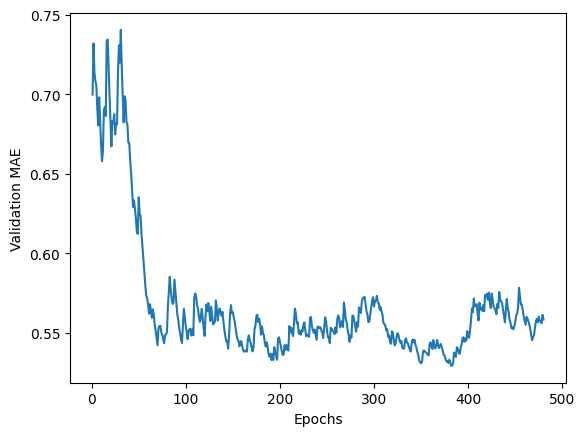

In [38]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else: smoothed_points.append(point)
  return smoothed_points
val_mae_values = history.history['val_mae']
average_mae_history = val_mae_values
smooth_mae_history =smooth_curve(average_mae_history[20:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [39]:
df['quality binary'] = df['quality'].apply(lambda x: 0 if x < 7 else 1)


In [40]:
 # Separate features and target
X_binary = df.drop(columns=["quality binary"])  # Features
y_binary = df["quality binary"]  # Target variable

# Split into 80% train and 20% test
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

print(f"Train set size: {X_train_binary.shape[0]}, Test set size: {X_test_binary.shape[0]}")


Train set size: 1279, Test set size: 320


Train a neural network model for binary quality prediction. (binary classification) How many units does the output layer have?Why?
output layer has only one unit since it is binary classification but it has activation function of sigmoid to squish the result to binary results 0 or 1 in this case

In [41]:
# Build the neural network model for binary classification
model_binary = models.Sequential([
    layers.Input(shape=(X_train_binary.shape[1],)),  # Input layer (based on number of features)
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 units
    layers.Dense(128, activation='relu'),  # Second hidden layer with 128 units
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model_binary.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the binary quality labels
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=500, batch_size=64,
                                  validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_binary.evaluate(X_test_binary, y_test_binary)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7905 - loss: 0.6381 - val_accuracy: 0.8984 - val_loss: 0.3502
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8719 - loss: 0.3794 - val_accuracy: 0.8984 - val_loss: 0.3131
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8717 - loss: 0.4142 - val_accuracy: 0.9062 - val_loss: 0.3185
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8656 - loss: 0.4217 - val_accuracy: 0.9062 - val_loss: 0.2970
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8671 - loss: 0.3976 - val_accuracy: 0.8984 - val_loss: 0.2988
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8335 - loss: 0.4292 - val_accuracy: 0.8984 - val_loss: 0.3113
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8433 - loss: 0.3827 - val_accuracy: 0.8984 - val_loss: 0.2877
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8706 - loss: 0.3738 - val_accuracy: 0.9062 -

Run Problem 6 but this time use the multilayer perceptron (MLP) from sklearn package to create the model.

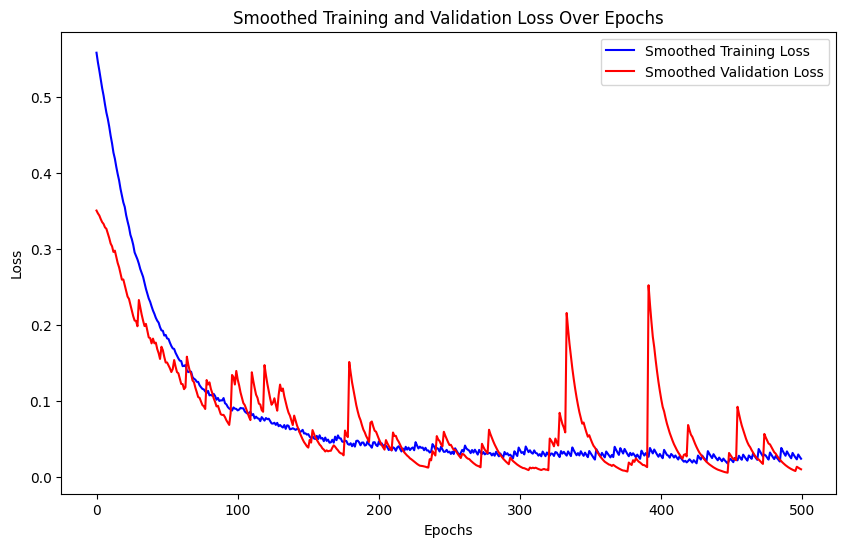

In [42]:
# Function to smooth the curve
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
train_loss = history_binary.history['loss']  # Training loss
val_loss = history_binary.history['val_loss']
# Apply smoothing to the loss values
smoothed_train_loss = smooth_curve(train_loss)
smoothed_val_loss = smooth_curve(val_loss)

# Plotting the smoothed training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(smoothed_train_loss, label='Smoothed Training Loss', color='blue')
plt.plot(smoothed_val_loss, label='Smoothed Validation Loss', color='red')
plt.title('Smoothed Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



based on the graph the best epoch is around 350

In [43]:
# Build the neural network model for binary classification
model_binary = models.Sequential([
    layers.Input(shape=(X_train_binary.shape[1],)),  # Input layer (based on number of features)
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 units
    layers.Dense(128, activation='relu'),  # Second hidden layer with 128 units
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model_binary.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the binary quality labels
history_binary = model_binary.fit(X_train_binary, y_train_binary, epochs=400, batch_size=64,
                                  validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_binary.evaluate(X_test_binary, y_test_binary)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

Epoch 1/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7663 - loss: 0.9573 - val_accuracy: 0.8984 - val_loss: 0.3202
Epoch 2/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8435 - loss: 0.4765 - val_accuracy: 0.8984 - val_loss: 0.3194
Epoch 3/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8498 - loss: 0.4484 - val_accuracy: 0.8984 - val_loss: 0.3411
Epoch 4/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8489 - loss: 0.5294 - val_accuracy: 0.8984 - val_loss: 0.3209
Epoch 5/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.4142 - val_accuracy: 0.8984 - val_loss: 0.2913
Epoch 6/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8208 - loss: 0.5075 - val_accuracy: 0.9141 - val_loss: 0.3208
Epoch 7/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7881 - loss: 0.5169 - val_accuracy: 0.8828 - val_loss: 0.4019
Epoch 8/400
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8671 - loss: 0.3759 - val_accuracy: 0.9141 - 

In [44]:
import numpy as np

# Add the "multiple quality" column based on the "quality" column
df['multiple quality'] = np.select(
    [df['quality'] <= 4, (df['quality'] > 4) & (df['quality'] < 7), df['quality'] >= 7],
    [0, 1, 2],  # Labels: 0 for bad quality, 1 for medium quality, 2 for good quality
    default=np.nan  # If the value doesn't fit any condition, assign NaN (though not needed here)
)

# Display the updated DataFrame
print(df[['quality', 'multiple quality']].head())


   quality  multiple quality
0        5               1.0
1        5               1.0
2        5               1.0
3        6               1.0
4        5               1.0


Separate the class labels (“quality”, “quality binary”and “multiple quality”) and divide the data into 80/20 train test splits. Train a neural network model for multiple quality prediction. (multiclass classification).
a. Train a neural network model for multi-class quality prediction. (multi-class classification). How many units does the output layer have?Why?
b.
Illustrate the training and validation loss. Choose the best number of epochs (based on validation and training loss) and rerun the model with the new epoch

In [45]:


# Separate features and target for multi-class classification (using 'multiple quality' as target)
X = df.drop(columns=["quality", "quality binary", "multiple quality"])  # Features
y = df["multiple quality"]  # Target variable (multiple quality)

# Convert target labels to one-hot encoding for multi-class classification
y_one_hot = to_categorical(y, num_classes=3)

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Build the neural network model for multi-class classification
model_multi_class = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer, based on number of features
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 units
    layers.Dense(128, activation='relu'),  # Second hidden layer with 128 units
    layers.Dense(3, activation='softmax')  # Output layer with 3 units (one per class), softmax activation
])

# Compile the model
model_multi_class.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the multi-class quality labels
history_multi_class = model_multi_class.fit(X_train, y_train, epochs=500, batch_size=64,
                                            validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_multi_class.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6771 - loss: 1.7836 - val_accuracy: 0.8281 - val_loss: 0.5930
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8262 - loss: 0.5878 - val_accuracy: 0.8281 - val_loss: 0.7057
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8028 - loss: 0.6781 - val_accuracy: 0.8281 - val_loss: 0.6385
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7592 - loss: 0.8090 - val_accuracy: 0.8125 - val_loss: 0.5678
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8497 - loss: 0.5471 - val_accuracy: 0.7891 - val_loss: 0.6058
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8181 - loss: 0.5929 - val_accuracy: 0.8281 - val_loss: 0.5482
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8223 - loss: 0.5879 - val_accuracy: 0.8281 - val_loss: 0.6246
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8435 - loss: 0.5729 - val_accuracy: 0.8047 - 

the output layer has three units since it is multiclass classifications and has activation function softmax

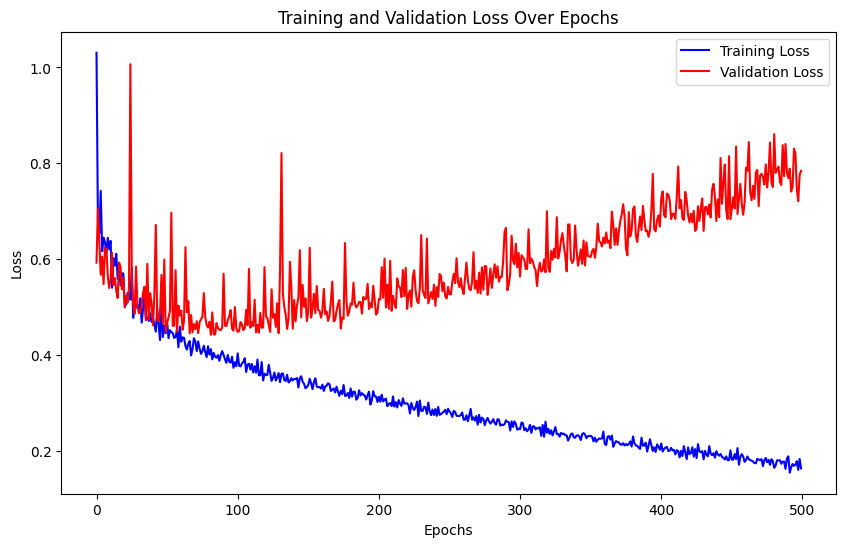

In [46]:

# Get the training and validation loss from the history object
train_loss = history_multi_class.history['loss']
val_loss = history_multi_class.history['val_loss']

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Run Problem 6 but this time use the multilayer perceptron (MLP) from sklearn package to create the model.

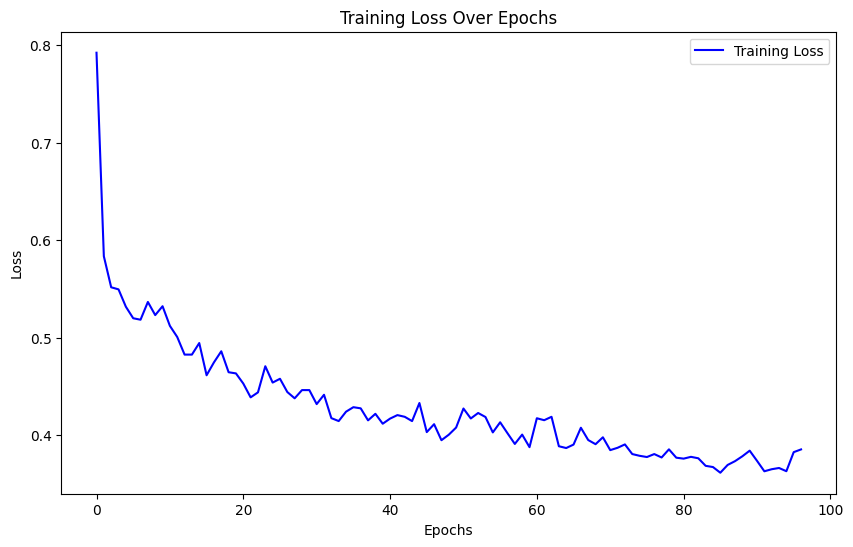


Test Accuracy: 0.8313


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(columns=["quality", "quality binary", "multiple quality"])  # Features
y = df["multiple quality"]  # Target variable (multiple quality)

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=500, batch_size=64, solver='adam',
                    activation='relu', random_state=42, warm_start=True)

# Train the model
mlp.fit(X_train, y_train)

# Plot the learning curve (training and validation loss)
train_loss = mlp.loss_curve_  # MLPClassifier stores training loss curve here

# Here, validation loss is not directly available in sklearn's MLPClassifier.
# But we can plot the training loss and track it during training.

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_accuracy = mlp.score(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Compare the results of the classifiers of question 6 and 7. Can we have a definitive answer on which model is the best based on this analysis?
no they result are almost equal so definitive answer which one is good or bad